# Game Plan for Exponential Smoothing and Holt-Winters

# Case Study Briefing: Customer Complaints

TelecoWave is a very big player in the telecom world and they're facing a challenge. Customer Complaints are all over the place. Some of the time its smooth sailing but some other time it's chaos. So they want us to predict this swing.

Our objective is to:
1. Help them achieve excellent customer service.
2. Show our proficiency in handling data.

The problem: Rollercoaster of complaints. They want to know how many Customer Service Reps they need for each week. If you get it wrong, you're either wasting resources or underestimate needs which leads to unhappy customers. So we need to craft our strategy to pick the right amount workforce.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the data and setting the index
data = pd.read_csv("../dataset/weekly_customer_complaints.csv", index_col="week", parse_dates=True)
data.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [9]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [11]:
# Setting freq to W implies that the week starts on a Sunday, that's why the previous result shows freq=None
# data.asfreq('W')

# So we do it like this instead
data = data.asfreq('W-Mon')
data.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


In [12]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

## Data Pre-processing

In [6]:
# Remove comma and transform it into float
data['complaints'] = data['complaints'].str.replace(',','').astype(float)
data.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


## Exploratory Data Analysis

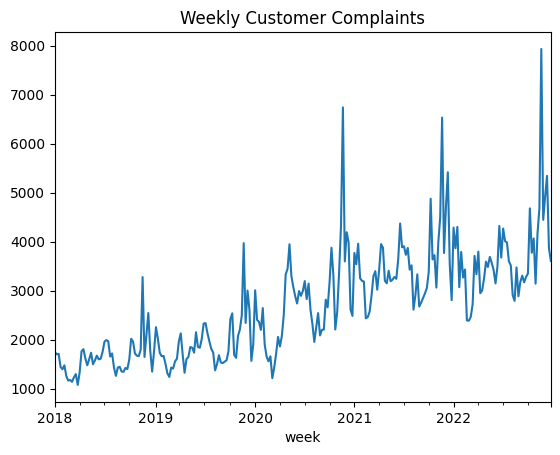

In [13]:
# Daily Closing Price Plot
data['complaints'].plot(title='Weekly Customer Complaints')
plt.show()

At first, it shows like a multiplicative models, but we are not sure yet. We'll have to make sure of it.

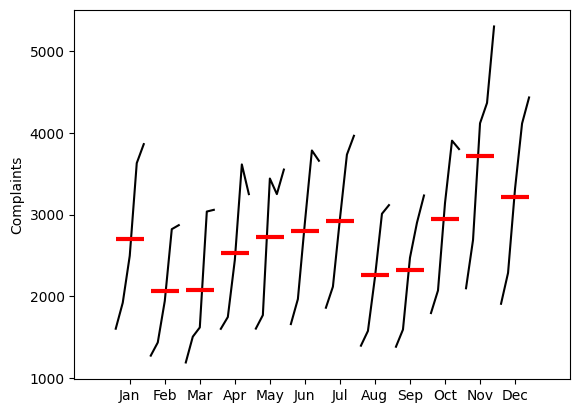

In [21]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data['complaints'].resample('ME').mean(), ylabel='Complaints')
plt.show()

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_12709/692138386.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(data['complaints'].resample('Q').mean(), ylabel='Complaints')


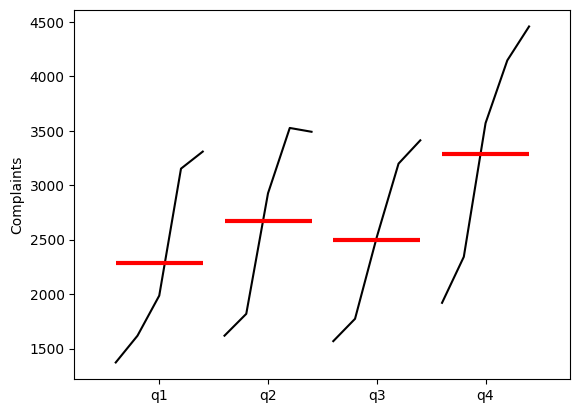

In [22]:
from statsmodels.graphics.tsaplots import quarter_plot

quarter_plot(data['complaints'].resample('Q').mean(), ylabel='Complaints')
plt.show()

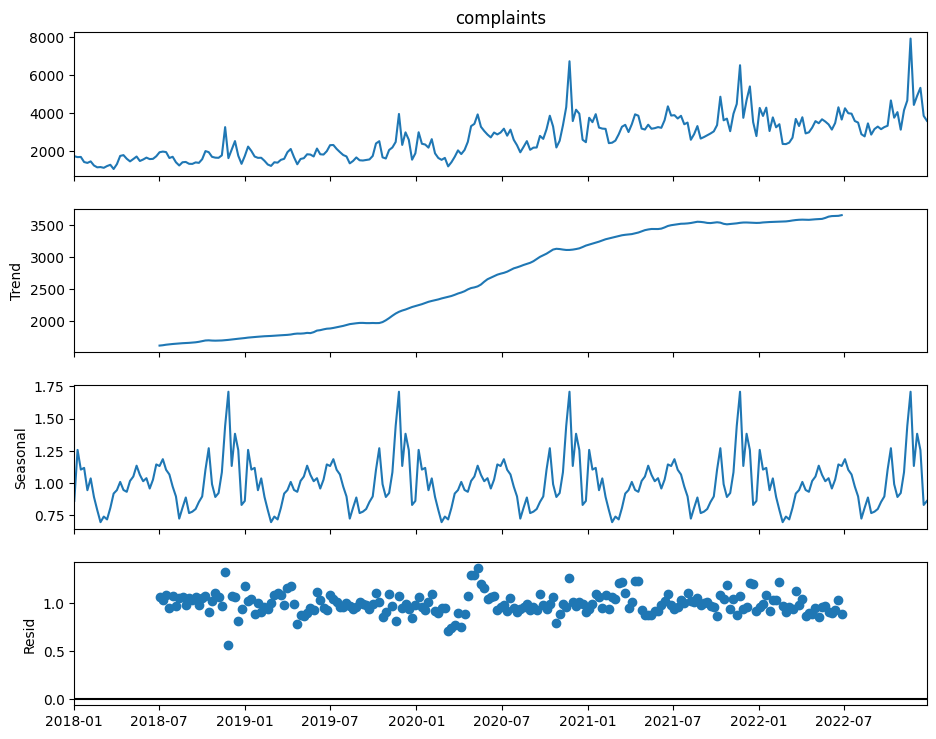

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(data['complaints'], model='multiplicative', period=52)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

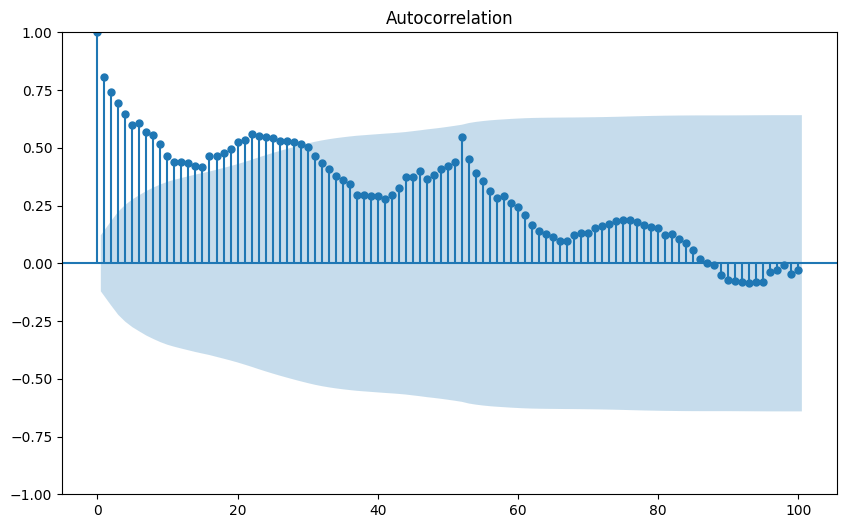

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

# Python Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(data['complaints'], lags=100, ax=ax)
plt.show()

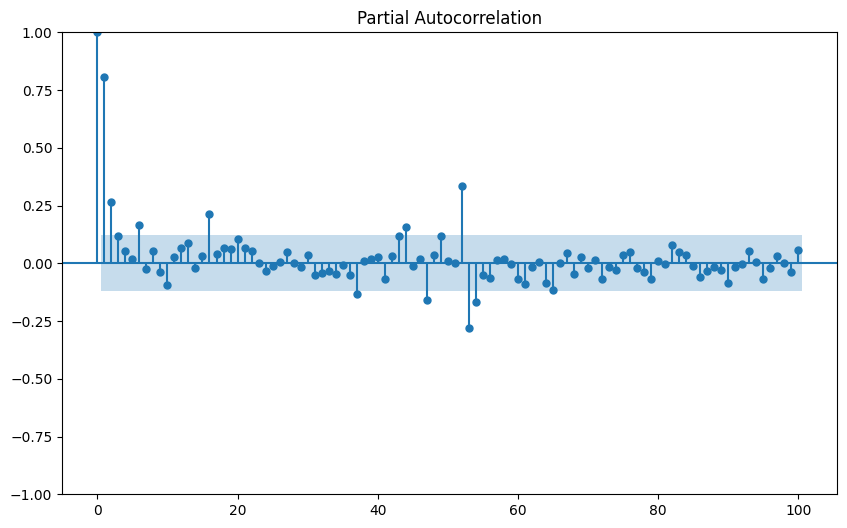

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf

# Python Partial Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(data['complaints'], lags=100, ax=ax)
plt.show()

## Training and Test Set in Time Series

Normally, we would pick and split dataset by 80% to be used as training set, and the rest 20% is used for test set. But that doesn't work in Time Series because each data point have context and informations that is affected by the order. So the model validation will be different.

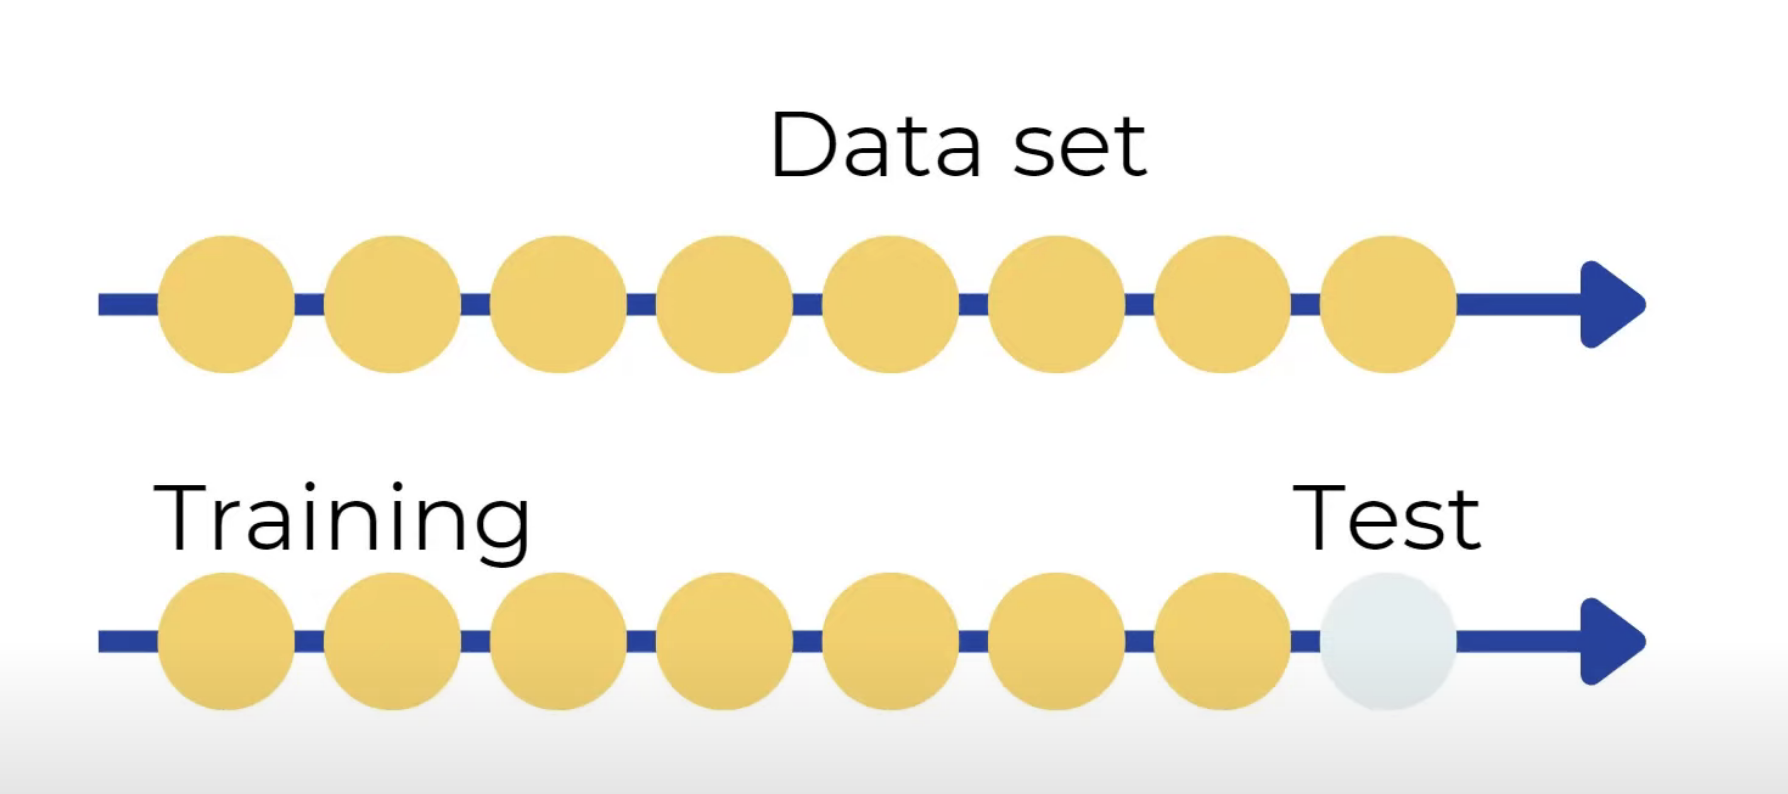

In Time series dataset, we remove the last period (the white), and the prior data will be used as training data (the yellow). The data is NOT shuffled.

The actual practice:
* The test length should be the desired forecasting length. If you need to predict 3 months, then the test set should be 3 months.
* You should have at least 2 whole periods (ideally 3) of data for training.

**Goal : to predict the next quarter (13 weeks)**

In [41]:
periods = 13
train, test = data.iloc[:-periods, 0], data.iloc[-periods:, 0]

In [42]:
train.head()

week
2018-01-01    1750.0
2018-01-08    1701.0
2018-01-15    1711.0
2018-01-22    1443.0
2018-01-29    1397.0
Freq: W-MON, Name: complaints, dtype: float64

In [43]:
test.head()

week
2022-10-03    3350.0
2022-10-10    4679.0
2022-10-17    3773.0
2022-10-24    4065.0
2022-10-31    3142.0
Freq: W-MON, Name: complaints, dtype: float64

## Simple Exponential Smoothing

What is exponential smoothing?

Let's say we are checking our weekly sales. We're trying to find a steady rhythm in this numerical pattern. But we're not calculating it by simple average formula. instead, we put emphasis on most recent sales or period.

**Formula** <br />
The next forecast = Current Level + alpha (Recent actual - Current level)

**Example** <br />
Current level = 100 cups sold today <br />
Recent actual = 120 cups sold yesterday <br />
If alpha = 0.2 <br />

then, the next forecast is..<br />
100 + 0.2 * (120 - 100) = 104

By applying this to our data, we are smoothing weekly complaints to avoid surprise spikes. But remember, every smoothing tool has limitations and it is not infallible.

In [57]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Simple Exponential Smoothing Model and Prediction
model_simple = SimpleExpSmoothing(train).fit()
predictions_simple = model_simple.forecast(steps=len(test))

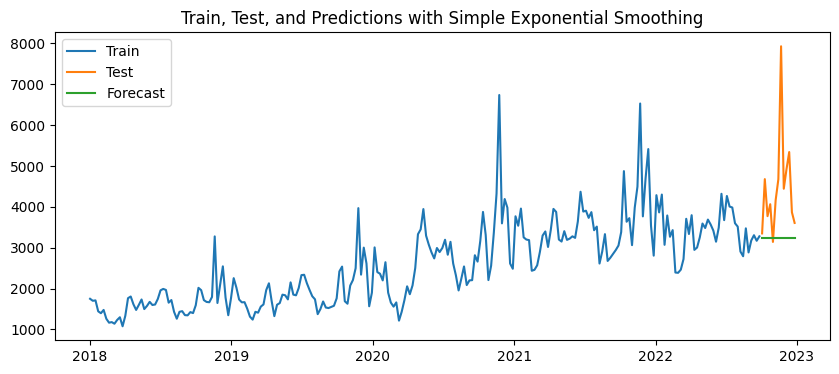

In [58]:
# Plot training, test, and forecasts
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_simple, label='Forecast')
plt.title("Train, Test, and Predictions with Simple Exponential Smoothing")
plt.legend()
plt.show()

The Simple Exponential Formula can be used as these different forms:

y(t+1) = y(t) + alpha * (X - y(t))

or

y(t+1) = alpha * X + (1 - alpha) * y(t)

## Double Exponential Smoothing

Why "Double" ?

The Simple Exponential Smoothing smooths out data, but double exponential smoothiing also handles trends in data. It captures overall sales trend in addition to smoothing.

Formula:
Smoothed Level = alpha * Recent Actual + (1 - alpha) * (Previous Level - Previous Trend)

y(t+1) = alpha * X + (1 - alpha) * (y(t) - T(t-1))


Smoothed Trend = beta * (Smoothed Level - Previous Level) + (1 - beta) * Previous Trend

T(t+1) = beta * ( y(t) - y(t-1) ) + (1 - beta) * T(t-1)

With this formula, alpha adjust recent sales impact and beta tunes trend speed.

As an example, let's say that our sales have been increasing overall. We assume sales rise with weekly fluctuations. Double exponential smoothing helps us to see if that upwards trajectory is actually coming from the trend and not just from these weekly fluctuations.

Caution: Double Exponential Smoothing doesn't tackle seasonality. It just basically filters noise, revealing the sales trend.